In [1]:
import pandas as pd

# Load the CSV file into a dataframe
df = pd.read_csv('0912-ori-15v0.csv', sep=',', engine='python', on_bad_lines='skip')

# Count the occurrences of 'f', 'h', and 'n'
f_count = (df['EventType'] == 'f').sum()
h_count = (df['EventType'] == 'h').sum()
n_count = (df['EventType'] == 'n').sum()

# Calculate the ratios
f_ratio = f_count / n_count if n_count != 0 else 0
h_ratio = h_count / n_count if n_count != 0 else 0

# Display the results
print(f"Number of 'f' events: {f_count}")
print(f"Number of 'h' events: {h_count}")
print(f"Ratio of 'f' to 'n': {f_ratio}")
print(f"Ratio of 'h' to 'n': {h_ratio}")

Number of 'f' events: 619
Number of 'h' events: 22072
Ratio of 'f' to 'n': 0.027278335977436983
Ratio of 'h' to 'n': 0.9726775956284153


In [2]:
import matplotlib.pyplot as plt

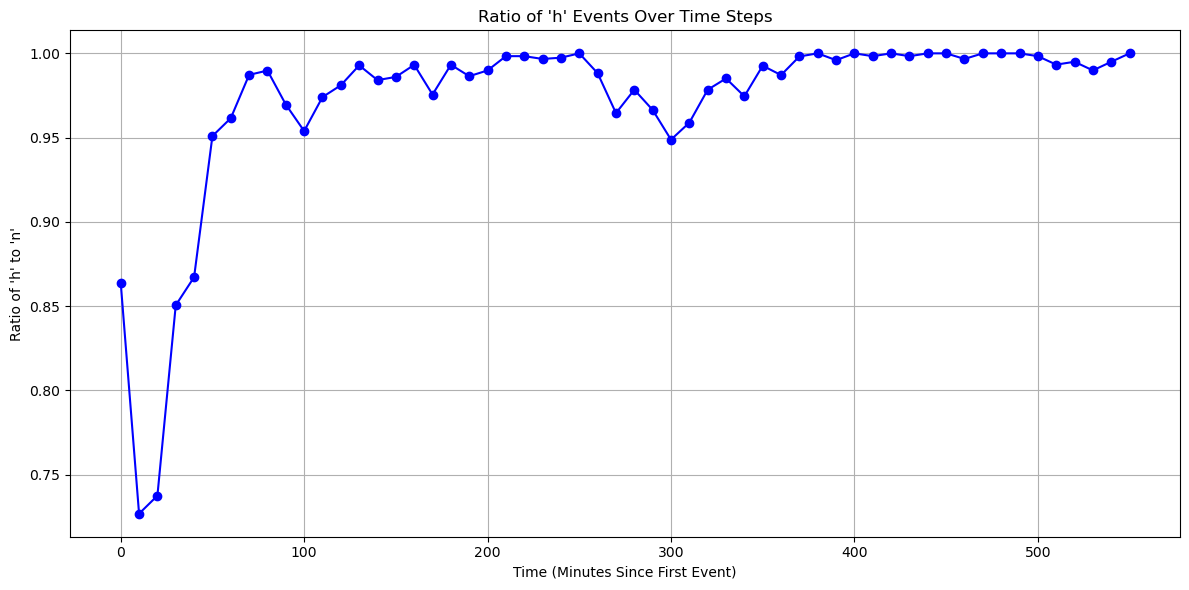

In [4]:
# Convert 'Time' column to datetime if it's not already
df['Time'] = pd.to_datetime(df['Time'])

# Find the first event time
first_time = df['Time'].min()

# Calculate time difference from the first event (in seconds or minutes, depending on your preference)
df['TimeStep'] = (df['Time'] - first_time).dt.total_seconds() / 60  # Convert to minutes

# Define time intervals (e.g., every 10 minutes)
interval = 10
df['TimeInterval'] = (df['TimeStep'] // interval) * interval

# Group by time interval
time_grouped = df.groupby('TimeInterval')

# Initialize lists for storing results
intervals = []
h_ratios = []

# Calculate the ratio of 'h' events for each time interval
for interval, group in time_grouped:
    f_count = (group['EventType'] == 'f').sum()
    h_count = (group['EventType'] == 'h').sum()
    n_count = (group['EventType'] == 'n').sum()
    
    # Avoid division by zero
    ratio_h = h_count / n_count if n_count != 0 else 0
    
    intervals.append(interval)
    h_ratios.append(ratio_h)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(intervals, h_ratios, marker='o', linestyle='-', color='b')
plt.xlabel('Time (Minutes Since First Event)')
plt.ylabel('Ratio of \'h\' to \'n\'')
plt.title('Ratio of \'h\' Events Over Time Steps')
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_h_ratio(file_path):

# Load the CSV file into a dataframe
    df = pd.read_csv(file_path, sep=',', engine='python', on_bad_lines='skip')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f')

# Create a 'Trial' column, incrementing a counter every time an 'n' event occurs
    df['Trial'] = (df['EventType'] == 'n').cumsum()
    df['Group'] = (df['Trial'] - 1) // 250
    trial_grouped = df.groupby('Group')

    # Initialize lists to store trial numbers and h-ratios
    trials = []
    h_ratios = []

    # Calculate the ratio of 'h' events for each trial
    for trial, group in trial_grouped:
        # total_events = len(group)
        h_count = (group['EventType'] == 'h').sum()
        n_count = (group['EventType'] == 'n').sum()
        
        # Calculate the ratio of 'h' to total events
        h_ratio = h_count / n_count if n_count != 0 else 0

        # if h_count == 0:
        #     print(f"Trial {trial}: {h_count} 'h' events out of {total_events} total events")
        
        trials.append(trial)
        h_ratios.append(h_ratio)
    
    return trials, h_ratios
    
    # Plotting the ratio of 'h' events per trial
   

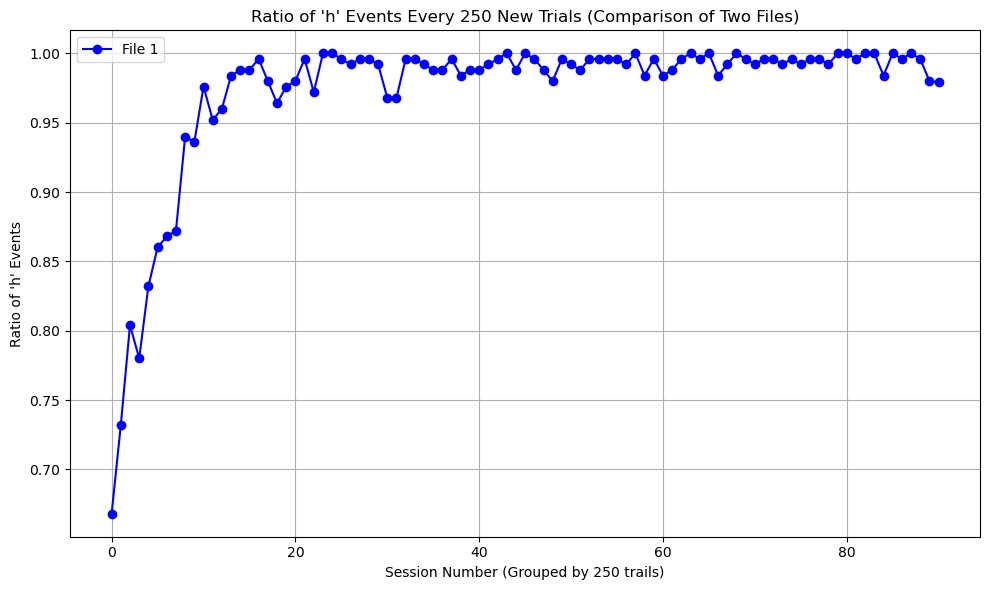

In [4]:
# Calculate the ratios for the two files


groups_file1, h_ratios_file1 = calculate_h_ratio('0912-ori-15v0.csv')
# groups_file2, h_ratios_file2 = calculate_h_ratio('0925-fixed-20v0.csv')

# Plotting
plt.figure(figsize=(10, 6))

# Plot ratios from the first file
plt.plot(groups_file1, h_ratios_file1, label='File 1', marker='o', linestyle='-', color='b')

# Plot ratios from the second file
# plt.plot(groups_file2, h_ratios_file2, label='File 2', marker='x', linestyle='--', color='r')

# Labeling the plot
plt.xlabel('Session Number (Grouped by 250 trails)')
plt.ylabel('Ratio of \'h\' Events')
plt.title('Ratio of \'h\' Events Every 250 New Trials (Comparison of Two Files)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()